In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Heights')

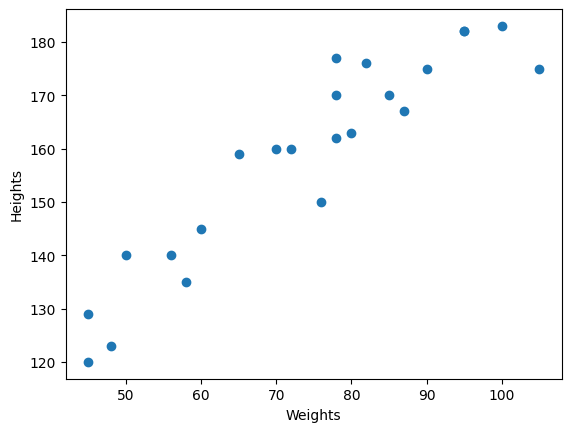

In [7]:
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("Weights")
plt.ylabel("Heights")


In [15]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [ ]:
x = df[['Weight']]   ## dependent features should always be in dataframe(2D) 
np.array(x).shape
type(x)

pandas.core.frame.DataFrame

In [21]:
y  = df['Height']

<Axes: >

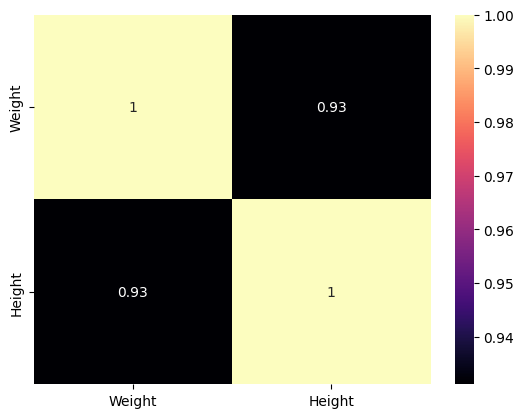

In [14]:
sns.heatmap(data=df.corr(),annot=True,cmap='magma')

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
x_train.shape

(17, 1)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [48]:
x_test = sc.transform(x_test)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
lr.intercept_

np.float64(156.47058823529412)

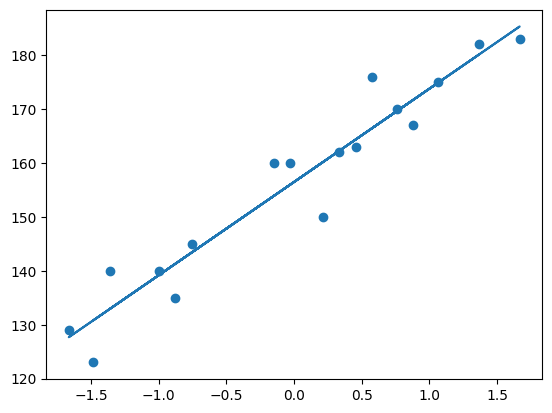

In [51]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))

In [ ]:
## ypred_test = 156.47 + 17.29(x_test)
## ypred_train = 156.47 + 17.29(x_train)
  

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [52]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

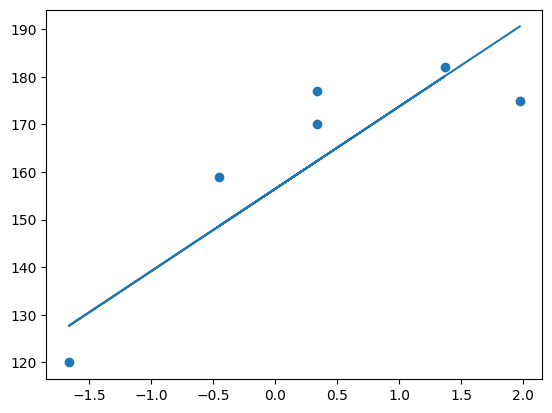

In [53]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test))

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)



In [57]:
print(mse,mae)
print(np.sqrt(mse))

114.84069295228699 9.66512588679501
10.716374991212605


In [59]:
print(r2_score(y_test,y_pred))

0.7360826717981276


## multiple linear regression


In [61]:
da = pd.read_csv("economic_index.csv")

In [62]:
da.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [63]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [64]:
da.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [65]:
df = da.copy()

In [67]:
da.drop(columns='Unnamed: 0',inplace=True)
da

KeyError: "['Unnamed: 0'] not found in axis"

In [68]:
da

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [90]:
x = da[['interest_rate','unemployment_rate']]
y = da['index_price']

In [ ]:
da.drop(columns=['year','month'],inplace=True)



In [ ]:
da

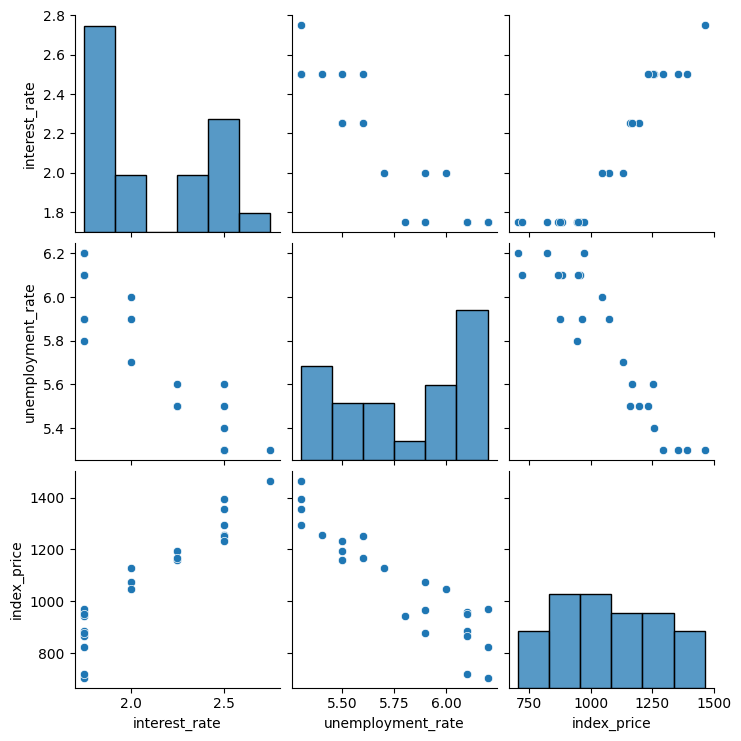

In [73]:
sns.pairplot(da)


In [91]:
da.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [ ]:
sns.barplot(x=da['interest_rate'],y='index_price',data=da,)

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

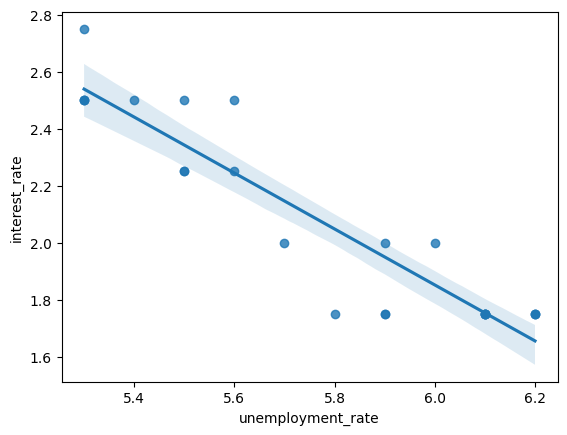

In [83]:
sns.regplot(x='unemployment_rate',y='interest_rate',data=da)

In [96]:
type(x_test)

pandas.core.frame.DataFrame

In [97]:
x_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [99]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
lr.coef_

array([  88.27275507, -116.25716066])

In [103]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(lr,x_train,y_train,cv=3)
cross

array([0.88856676, 0.82159918, 0.85226213])

In [104]:
np.mean(cross)

np.float64(0.8541426890278224)

In [105]:
y_pred = lr.predict(x_test)

In [106]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

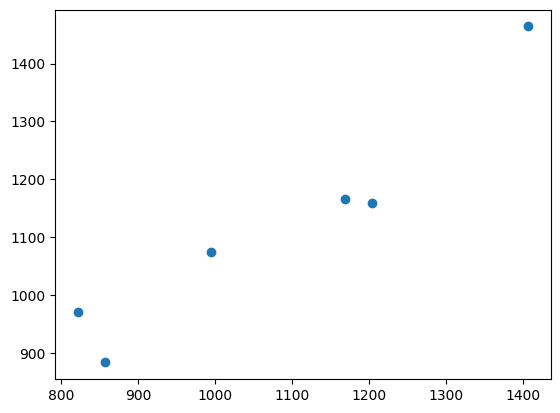

In [107]:
plt.scatter(y_pred,y_test)

In [109]:
res = y_pred - y_test
print(res)

8      45.227704
16   -149.349481
0     -57.486996
18    -26.291104
11    -80.090077
9       1.169327
Name: index_price, dtype: float64


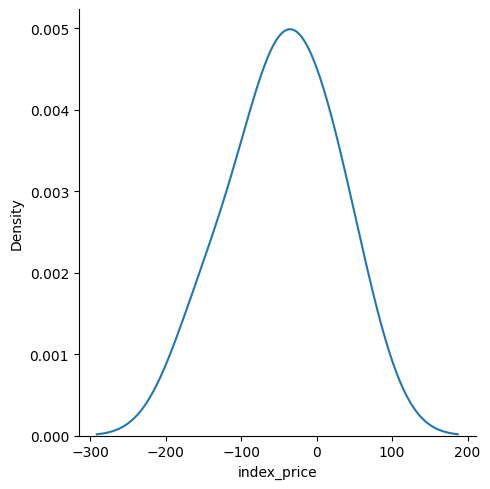

In [111]:
sns.displot(res,kind='kde')

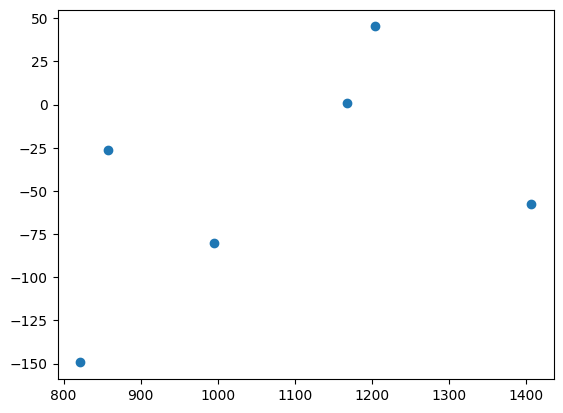

In [113]:
plt.scatter(y_pred,res)